# Problem 4: Fourier transform (3 pts)

### <div align="right"> &copy; Yurii Laba & Rostyslav Hryniv, 2023 </div>

## Completed by:   
*   First team member Nazar
*   Second team member Roman Kovalchuk

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftfreq
%matplotlib inline
import random

random.seed(42)

## Task 1. Continuous signals, pure tones, and Fourier series (1 pts)

An analog audiosignal $\mathbf{x}$ of duration $T$ is a real-valued (usually continuous) function over $[0,T]$, whose value $\mathbf{x}(t)$ at a time moment $t$ represents the amplitude of air pressure variations, i.e., the change in air pressure with respect to some reference value. These pressure variations cause virbations of the ear drums, which are converted into electromagnetic impulses that are then sent to our brain.

Physical laws of gas dynamics imply that each such signal can be represented as a superposition of periodic ***pure tones*** $\sin( \omega t + \phi)$, i.e.,
$$\mathbf{x}(t) = \sum a_k \sin(\omega_k t + \phi_k).$$
Here $a_k$ is the amplitude of the respective pure wave of ***frequency*** $\omega_k/2\pi$ Hz (Hertz, cycles per second) and phase shift of $\phi_k$ radians. Observe that a wave of frequency $\omega_k/2\pi$ Hz has a period of $2\pi/\omega_k$ seconds.

The signal $\mathbf{x}$ can be regarded as periodic of period $T$ and can be represented via the ***Fourier series***
$$
  \mathbf{x}(t) = \frac{a_0}{2} + \sum_k a_k \cos(2\pi k t / T) + \sum_k b_k \sin(2\pi k t/T),
$$
where
$$
 a_k:= \frac{2}{T} \int_0^T f(s)\cos(2\pi ks/T)\,ds,  \qquad b_k:= \frac{2}{T} \int_0^T f(s)\sin(2\pi ks/T)\,ds
$$
are the ***Fourier coefficients***.


---
### Task 1.1.
Consider the signal
$$
  \mathbf{x}(t) = 0.5 \sin(2t) - \sin(3t) + n_t
$$
over the interval $[0,4\pi]$, where $n_t$ is the *white noise*, i.e., a family of independent Gaussian random variables $\mathcal{N}(0, \sigma^2)$ with $\sigma^2 = 0.01$.
- Generate the noiseles signal $\mathbf{x}$ and then add the noise to form $\mathbf{x}_\mathrm{noise}$
- Calculate the Fourier coefficients $a_k$ and $b_k$ of noiseless signal $\mathbf{x}$ for $k = 0,1, \dots, 200$ and plot them. Comment on any special features in the distribution of $a_k$ and $b_k$ you have noticed
- Calculate the Fourier coefficients $a_k$ and $b_k$ of the noisy signal $\mathbf{x}_\mathrm{noise}$ for $k = 0,1, \dots, 200$ and plot them. Comment on any special features in the distribution of $a_k$ and $b_k$ you have noticed
- Determine several (4-6) most important Fourier coefficients $a_k$ and $b_k$. What $k$ do they correspond to? What are the corresponding frequencies?
  
Use the grid of $200$ points $t_j$ for plotting and calculation of the Fourier coefficients (i.e., for numerical integration)

---

In [2]:
import numpy as np
import hvplot.pandas
import pandas as pd

# Set the parameters
N = 200
t_j = np.linspace(0, 4 * np.pi, N)
sigma_squared = 0.01  # variance of the white noise

# Generate the noiseless signal x(t)
x_t_noiseless = 0.5 * np.sin(2 * t_j) - np.sin(3 * t_j)

# Generate the white noise n(t)
n_t = np.random.normal(0, np.sqrt(sigma_squared), len(t_j))

# Add the noise to the signal
x_t_noisy = x_t_noiseless + n_t

# Convert arrays to Pandas DataFrame for hvplot
df = pd.DataFrame({'Time': t_j, 'Noiseless Signal': x_t_noiseless, 'White Noise': n_t, 'Noisy Signal': x_t_noisy})

noiseless_plot = df.hvplot.line(x='Time', y='Noiseless Signal', title='Noiseless Signal', ylabel='Amplitude')
noise_plot = df.hvplot.line(x='Time', y='White Noise', title='White Noise', ylabel='Amplitude')
noisy_plot = df.hvplot.line(x='Time', y='Noisy Signal', title='Noisy Signal', ylabel='Amplitude')
fourier_plot = df.hvplot.line(x='Time', y='Noisy Signal', title='Fourier Coefficients', ylabel='Amplitude')
layout = (noiseless_plot + noise_plot + noisy_plot).cols(1)

layout

:Layout
   .Curve.I   :Curve   [Time]   (Noiseless Signal)
   .Curve.II  :Curve   [Time]   (White Noise)
   .Curve.III :Curve   [Time]   (Noisy Signal)

In [3]:
import numpy as np
import matplotlib.pyplot as plt

T = df.loc[N-1, 'Time'] - df.loc[0, 'Time']
dt = T / N

# Frequency values
frequencies = np.fft.fftfreq(N, dt)

a_k = np.zeros(N)
b_k = np.zeros(N)

for k in range(len(df)):
    df.loc[k, 'k'] = k
    df.loc[k, 'a_k'] = (2 / T) * np.trapz(df.loc[:, 'Noiseless Signal'] * np.cos(2 * np.pi * k * df.loc[:, 'Time'] / T), df.loc[:, 'Time'])
    df.loc[k, 'b_k'] = (2 / T) * np.trapz(df.loc[:, 'Noiseless Signal'] * np.sin(2 * np.pi * k * df.loc[:, 'Time'] / T), df.loc[:, 'Time'])

df.loc[df.loc[:, 'k'] == 0, 'a_k'] = 0

a_k_plot = df.hvplot.line(x='k', y='a_k', title='a_k', ylabel='Value')
b_k_plot = df.hvplot.line(x='k', y='b_k', title='b_k', ylabel='Value')
b_k_scatter = df.hvplot.scatter(x='k', y='b_k', title='b_k', ylabel='Value')
layout = (a_k_plot + b_k_plot * b_k_scatter).cols(1)
layout

:Layout
   .Curve.I   :Curve   [k]   (a_k)
   .Overlay.I :Overlay
      .Curve.I   :Curve   [k]   (b_k)
      .Scatter.I :Scatter   [k]   (b_k)

As we can see from the plot, with higher $K$ values the $a_k$ parameter deviates more, however stays stable with no extra values at the very beginning and end, as the $b_k$ does.
However, if we zoom to the same scale $b_k$ plot as $a_k$ plot, we would see that the variance increase is similar in tempo
### 1.2
Let's see how the fourier approximation changes with different $K$ values

In [4]:
import holoviews as hv

def fourier_extrapolation(x, n_predict=12, n_harm=12):
    n = x.size
    xf = np.fft.fft(x)
    f = np.fft.fftfreq(n)
    indexes = list(range(n))
    indexes.sort(key=lambda i: np.absolute(f[i]))
    t = np.arange (0, n + n_predict)
    restored_ser = np.zeros(t.size)
    for j in indexes[:1 + n_harm *2]:
        ampl = np.absolute(xf[j]) / n
        # amplitude
        phase = np.angle(xf[j])
        # phase
        restored_ser += ampl * np.cos(2 * np.pi * f[j] * t + phase)

    return restored_ser

k_values = [5, 10, 50, 100, 150, 200]

plots = []

for k_value in k_values:
    df.loc[:, 'Fourier Series'] = fourier_extrapolation(x=df.loc[:, 'Noiseless Signal'], n_predict=0, n_harm=k_value)
    plot = df.hvplot.line(
        x='Time',
        y=['Noiseless Signal', 'Fourier Series'],
        ylabel='Amplitude',
        title=f'Fourier Series (k={k_value})',
        legend='top_left'
    )
    plots.append(plot)

hv.Layout(plots).opts(shared_axes=False).cols(2)

:Layout
   .NdOverlay.I   :NdOverlay   [Variable]
      :Curve   [Time]   (value)
   .NdOverlay.II  :NdOverlay   [Variable]
      :Curve   [Time]   (value)
   .NdOverlay.III :NdOverlay   [Variable]
      :Curve   [Time]   (value)
   .NdOverlay.IV  :NdOverlay   [Variable]
      :Curve   [Time]   (value)
   .NdOverlay.V   :NdOverlay   [Variable]
      :Curve   [Time]   (value)
   .NdOverlay.VI  :NdOverlay   [Variable]
      :Curve   [Time]   (value)

As we can see after K = 5, our signal is perfectly restored, and there is no need to add additional factors into our fourier series
### 1.3
Let's explore the series approximation of noisy signal

In [5]:
import holoviews as hv

def fourier_extrapolation(x, n_predict=12, n_harm=12):
    n = x.size
    xf = np.fft.fft(x)
    f = np.fft.fftfreq(n)
    indexes = list(range(n))
    indexes.sort(key=lambda i: np.absolute(f[i]))
    t = np.arange (0, n + n_predict)
    restored_ser = np.zeros(t.size)
    for j in indexes[:1 + n_harm *2]:
        ampl = np.absolute(xf[j]) / n
        # amplitude
        phase = np.angle(xf[j])
        # phase
        restored_ser += ampl * np.cos(2 * np.pi * f[j] * t + phase)

    return restored_ser

k_values = [5, 10, 50, 100, 150, 200]

plots = []

for k_value in k_values:
    df.loc[:, 'Fourier Series'] = fourier_extrapolation(x=df.loc[:, 'Noisy Signal'], n_predict=0, n_harm=k_value)
    plot = df.hvplot.line(
        x='Time',
        y=['Noisy Signal', 'Fourier Series'],
        ylabel='Amplitude',
        title=f'Fourier Series (k={k_value})',
        legend='top_left'
    )
    plots.append(plot)

hv.Layout(plots).opts(shared_axes=False).cols(2)

:Layout
   .NdOverlay.I   :NdOverlay   [Variable]
      :Curve   [Time]   (value)
   .NdOverlay.II  :NdOverlay   [Variable]
      :Curve   [Time]   (value)
   .NdOverlay.III :NdOverlay   [Variable]
      :Curve   [Time]   (value)
   .NdOverlay.IV  :NdOverlay   [Variable]
      :Curve   [Time]   (value)
   .NdOverlay.V   :NdOverlay   [Variable]
      :Curve   [Time]   (value)
   .NdOverlay.VI  :NdOverlay   [Variable]
      :Curve   [Time]   (value)

As we can see after K = 10, the Fourier Series start to overfit the data and repeat the random noises we added on the first step. For our task of function approximation,
or signal reconstruction, even the K = 10 would do the job nicely, with following factors further overfitting the data, trying to recreate noises with additional series factors.

### 1.4
To find the crucial Fourier coefficients $(\(a_k\)$ and $\(b_k\))$, simply look for those with the largest magnitudes. These magnitudes signify the amplitudes of the corresponding sinusoidal elements in the Fourier series. Larger magnitudes indicate a more substantial impact on the signal.

In [6]:
sorted_coeffs = df.loc[:, ['k', 'a_k', 'b_k']].assign(magnitude=lambda x: np.sqrt(x['a_k']**2 + x['b_k']**2))
sorted_coeffs = sorted_coeffs.sort_values(by='magnitude', ascending=False)
top_coeffs = sorted_coeffs.head(6)
display(top_coeffs)
top_coeffs.hvplot.bar(x='k', y='magnitude', title='Top Fourier Coefficients and Frequencies', xlabel='k', ylabel='Magnitude', rot=45)

,k,a_k,b_k,magnitude
6,6.0,-1.093316e-16,-1.000000e+00,1.000000e+00
193,193.0,2.304466e-14,1.000000e+00,1.000000e+00
195,195.0,-2.214351e-14,-5.000000e-01,5.000000e-01
4,4.0,3.644386e-17,5.000000e-01,5.000000e-01
194,194.0,3.392592e-15,-1.431194e-14,1.470855e-14
185,185.0,1.370676e-14,6.129194e-16,1.372045e-14


:Bars   [k]   (magnitude)

---
### Task 1.2

- Construct approximations $\hat{\mathbf{x}}_n$ of $\mathbf{x}_{\mathrm{noise}}$ using $a_k$ and $b_k$ for $k = 0,1, \dots, n$, with $n=5, 10, 100, 200$
- Plot the original and reconstructed signals for $n = 5, 10, 100$, and $200$ and discuss the effect
- Calculate the accuracy of approximation based on the maximal value of $|\mathbf{x}_{\mathrm{noise}}(t_j) - \hat{\mathbf{x}}_n(t_j)|$  
- What goes wrong for $n=5$ and $n=200$? Can you explain strong change from $n=6$ to $n=7$? Also, increasing $n$ should improve proximity of $\hat{\mathbf{x}}_n$ and the original signal $\mathbf{x}_{\mathrm{noise}}$; however, $n=200$ gives very poor approximation.

Use the grid of $200$ points $t_j$ for plotting and calculation of the Fourier coefficients (i.e., numerical integration)

---

In [7]:
# Reconstruction of the signal using n sine and cosine Fourier coefficients
# Pay special attention to a_0!
def x_rec(n, a, b):
    # n is the number of coefficients a_k and b_k to be included
    # a is the 1d array of cosine coefficients
    # b is the 1d array of sine coefficients

    # Construct the approximation using the first n coefficients
    x_hat_n = a[0] / 2  # a_0/2 term

    for k in range(1, n):
        x_hat_n += a[k] * np.cos(2 * np.pi * k * df['Time']/T) + b[k] * np.sin(2 * np.pi * k * df['Time']/T)

    return x_hat_n

n_values = [5, 10, 100, 200]

for n in n_values:
    df[f'x_hat_{n}'] = x_rec(n, df['a_k'], df['b_k'])

# Plot the original signal and its approximations
original_and_approximations = df.hvplot.line(
    x='Time',
    y=['Noisy Signal'] + [f'x_hat_{n}' for n in n_values],
    ylabel='Amplitude',
    title='Original Noiseless Signal and Fourier Approximations',
    legend='right',
    width=1000,
    height=500,
)

original_and_approximations

:NdOverlay   [Variable]
   :Curve   [Time]   (value)

Compute parameters for noisy signal

In [8]:
import numpy as np
import matplotlib.pyplot as plt

T = df.loc[N - 1, 'Time'] - df.loc[0, 'Time']
dt = T / N

# Frequency values
frequencies = np.fft.fftfreq(N, dt)

a_k = np.zeros(N)
b_k = np.zeros(N)

for k in range(len(df)):
    df.loc[k, 'k'] = k
    if k == 0:
        df.loc[k, 'a_k'] = (1 / T) * np.trapz(df.loc[:, 'Noisy Signal'], df.loc[:, 'Time'])
    else:
        df.loc[k, 'a_k'] = (2 / T) * np.trapz(df.loc[:, 'Noisy Signal'] * np.cos(2 * np.pi * k * df.loc[:, 'Time'] / T),
                                              df.loc[:, 'Time'])
    df.loc[k, 'b_k'] = (2 / T) * np.trapz(df.loc[:, 'Noisy Signal'] * np.sin(2 * np.pi * k * df.loc[:, 'Time'] / T),
                                              df.loc[:, 'Time'])


a_k_plot = df.hvplot.line(x='k', y='a_k', title='a_k', ylabel='Value')
b_k_plot = df.hvplot.line(x='k', y='b_k', title='b_k', ylabel='Value')
b_k_scatter = df.hvplot.scatter(x='k', y='b_k', title='b_k', ylabel='Value')
layout = (a_k_plot + b_k_plot * b_k_scatter).cols(1)
layout

:Layout
   .Curve.I   :Curve   [k]   (a_k)
   .Overlay.I :Overlay
      .Curve.I   :Curve   [k]   (b_k)
      .Scatter.I :Scatter   [k]   (b_k)

In [9]:
# Reconstruction of the signal using n sine and cosine Fourier coefficients
# Pay special attention to a_0!
def x_rec(n, a, b):
    # n is the number of coefficients a_k and b_k to be included
    # a is the 1d array of cosine coefficients
    # b is the 1d array of sine coefficients

    # Construct the approximation using the first n coefficients
    #n = min(n, len(a), len(b))
    x_hat_n = a[0] / 2  # a_0/2 term

    for k in range(0, n):
        x_hat_n += a[k] * np.cos(2 * np.pi * k * df['Time'] / T) + b[k] * np.sin(2 * np.pi * k * df['Time'] / T)

    return x_hat_n


n_values = [5, 10, 100, 200]

for n in n_values:
    df[f'x_hat_{n}'] = x_rec(n, df['a_k'], df['b_k'])

# Plot the original signal and its approximations
original_and_approximations = df.hvplot.line(
    x='Time',
    y=['Noisy Signal'] + [f'x_hat_{n}' for n in n_values],
    ylabel='Amplitude',
    title='Original Noisy Signal and Fourier Approximations',
    legend='right',
    width=1000,
    height=500,
)

original_and_approximations

:NdOverlay   [Variable]
   :Curve   [Time]   (value)

In [10]:
np.allclose(df.loc[:, 'Noisy Signal'], x_rec(100, df['a_k'], df['b_k']), rtol=0.01)

False

In [11]:
df.loc[:, 'Noisy Signal'] - x_rec(100, df['a_k'], df['b_k'])

0      0.119582
1     -0.000265
2     -0.000265
3     -0.000265
4     -0.000265
         ...   
195   -0.000265
196   -0.000265
197   -0.000265
198   -0.000265
199   -0.120113
Length: 200, dtype: float64

In [12]:
np.max(np.abs(df.loc[:, 'Noisy Signal'] - x_rec(100, df['a_k'], df['b_k'])))

0.12011250369216118

---

As we can clearly see from the dataframe one cell above, we perfectly reconstructed our noisy signal even with k=100 samples, if would want to cancel the noise, we would recommend to use smaller K-term, as the signal has no extreme values, expressed with sin and cos without not-gradual steps. (The Fourier Series is very sensitive to the outliers and non-gradual steps in functions)

When K = 10 reconstructed original signal with no-noise
When K = 5 the reconstructed signal did not have enough terms to reconstruct original signal
With higher than K = 100 terms, the signal deteriorates, completely vanishing our lower error with K = 10 or 100 with noise
So, the K = 200 gives a very poor approximation. Furthermore, values of $a_k$ and $b_k$ at $n=6$ and $n=7$ are also out of valid range as was seen on previous charts
The extreme change on $n=5$ to $n=7$ can be explained as we added new significant term with high coefficient, which matched our signal oscillations more

---

## Task 2. Sampling and aliasing (0.7 pts)

There are several reasons for appearance of the spurious frequencies in the above example, the main one being related to ***aliasing***.

Assume we measure an analogue signal $\mathbf{x}$ of duration $T$ on the time lattice $t_j = \Delta t \cdot j$, $j=0,1, \dots, N-1$. The time step $\Delta t = T/N$ is called the ***sample period***, and the number of samples per 1 second, $f_s = 1/\Delta t = N/T$, is the ***sampling rate***. The process of measuring the input analog signal at the points $t_j$ is called ***sampling***; we then discretize the obtained values $\mathbf{x}(t_j)$ to form a ***digital signal*** $\mathbf{x} = \bigl(x(0), x(t_1),\dots, x(t_{N-1})\bigr)$ of length $N$.

The point is, some pure tones (harmonics) $\sin(\omega t)$ or $\cos(\omega t)$ have identical samples. Indeed, to have
$$
  \cos(\omega_1 t_j) = \cos(\omega_2 t_j), \qquad j = 0,1, \dots, N-1,
$$
it is necessary and sufficient that
$$
  \sin\Bigl(\frac{\omega_1 - \omega_2}{2}t_j\Bigr) \sin\Bigl(\frac{\omega_1 + \omega_2}{2}t_j\Bigr) = 0
$$
i.e.,
$$
  (\omega_1 + \omega_2) \Delta t = 2\pi k \quad\text{or}\quad
  (\omega_1 - \omega_2) \Delta t = 2\pi k
$$
A similar condition can be written for two sinusoids $\sin(\omega_1 t)$ and $\sin(\omega_2 t)$ to have identical samples.



---
### Task 2.1

- Assume that we take $20$ samples of the signal of duration $4\pi$. What is the sampling rate of the resulting signal?
- Given the signal $\sin(2t)$, find $k$ such that  $-\sin(kt)$ coincides with it at the $20$ sample points. Explain your choice and plot the graphs to demonstrate the effect
- Take the signal $\mathbf{x}$ without white noise and suggest a linear combination of two other sinusoids that coincides with $\mathbf{x}$ at the $20$ sampled points. Explain your choice and plot the graphs to demonstrate the effect.
---


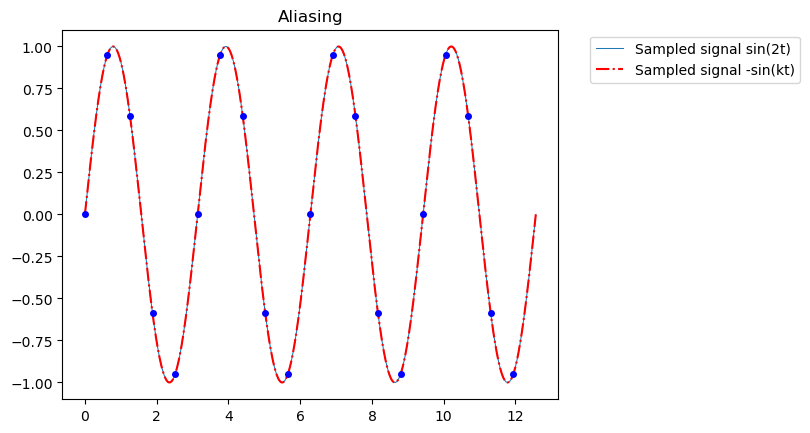

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True]
Sampling Rate: 1.59


In [13]:
t = np.linspace(0, 4 * np.pi, 1000)
y = np.linspace(0,4*np.pi, 21)[:-1]

plt.plot(t, np.sin(2*t), lw = 0.75, label = "Sampled signal sin(2t)")

# ========= YOUR CODE STARTS HERE ========= #

Delta_t = y[1] - y[0]
sampling_rate = 1 / Delta_t

# Plot the sampled signal -sin(kt)
k = -2  # Choose an appropriate k value
# ========== YOUR CODE ENDS HERE ========== #

plt.plot(t, -np.sin(k*t), "r-.", label = "Sampled signal -sin(kt)")
plt.plot(y, np.sin(2*y), "bo", markersize = 4)
plt.title('Aliasing')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

print(np.isclose(np.sin(2*y), -np.sin(8*y)))
print(f"Sampling Rate: {sampling_rate:.2f}")

The signal of -sin(2t) coincides with -sin(kt) signal, when k=2, because we can factor out the minus sign from sin adn we would be left with the same function

Now find aliasing to the initial signal; it should be a linear combination of two sine signals $\sin(\omega t)$ with $\omega$ different from $2$ and $3$

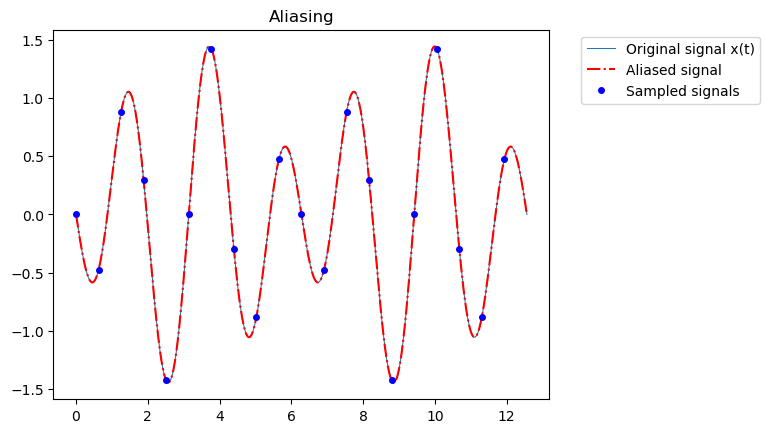

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Generate the time values for the original signal
t = np.linspace(0, 4 * np.pi, 1000)

# Generate the original signal x(t)
x = 0.5 * np.sin(2 * t) - np.sin(3 * t)

# Generate the sampled signal with 20 samples
y = np.linspace(0, 4 * np.pi, 21)[:-1]

# Plot the original signal x(t)
plt.plot(t, x, lw=0.75, label="Original signal x(t)")

# Choose a frequency different from 2 and 3 for aliasing
omega_aliasing = -3

# Plot the aliased signal as a linear combination of two sine signals
plt.plot(t, 0.5 * np.sin(2 * t) + np.sin(omega_aliasing * t), "r-.", label="Aliased signal")

# Plot the sampled signals
plt.plot(y, 0.5 * np.sin(2 * y) + np.sin(omega_aliasing * y), "bo", markersize=4, label="Sampled signals")

plt.title('Aliasing')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()


In [15]:
# ========= YOUR CODE STARTS HERE ========= #
np.allclose(x, 0.5 * np.sin(2 * t) + np.sin(omega_aliasing * t))
# ========== YOUR CODE ENDS HERE ========== #

True

---

In Task 2.1, the significance of aliasing is demonstrated through the exploration of sampling analog signals. Aliasing is crucial to understand as it highlights the potential pitfalls when sampling rates are insufficient, leading to distorted and misleading representations of signals. In this task, we achieved the following tasks: generated an analog signal $\( \sin(2t) \)$, sampled it within a specified interval, explicitly calculated the sampling rate, and illustrated the aliasing effect by comparing the sampled signal $\( \sin(2t) \)$ with $\( -\sin(kt) \)$. The task worked by explicitly calculating the sampling rate and choosing an inappropriate frequency $(\( k \))$, showcasing how undersampling and poor frequency selection can result in aliasing, where different signals appear identical in their sampled form.

In the discussion of aliasing, the choice of $\( \omega \)$ is crucial because it determines the characteristics of the original analog signal. In this specific task, $\( \sin(2t) \)$ is chosen as the original signal. The code then introduces another frequency $\( k \)$ to demonstrate the aliasing effect when comparing the sampled signal $\( \sin(2t) \)$ with $\( -\sin(kt) \)$. The aliasing occurs when $\( \omega \)$ is chosen inappropriately, leading to identical samples and potential misinterpretation of the signal.


---

## Task 3. Fourier transform and FFT (1 pt)

Another reason why spurious frequencies appeared in ***Task 1.2*** is due to integration error. When we replaced the integrals for calculating the Fourier coefficinets $a_k$ and $b_k$ by the Riemann integral sums, aliasing for sinusoids with high frequencies led to results identical with those for smaller frequencies, although the actual $a_k$ and $b_k$ are equal to zero for smooth signal and are very small for noisy signal.

In other words, when replacing integrals with sums, we actually moved the object of study from the analog signals in $L_2[0,4\pi]$ to digital signals in $\mathbb{R}^N$. Certainly, $N$ sampled cosines and $N$ sampled sines formed linearly dependent vectors in $\mathbb{R}^N$, and that is why using all of them to reconstruct the original signal $\mathbf{x}_\mathrm{noise}$ failed.

When working with digital signals in $\mathbb{R}^N$, we only need $N$ basis vectors. Observe that sampled cosines are <font color="red">*even*</font> functions with respect to mid-point, i.e., $\cos(t_j) = \cos(t_{N-j})$; likewise, sines are <em><font color="red">odd</font></em> with respect to the mid-point. Another observation is that neither sampled cosines nor sampled sines form orthogonal sets. For that reason, a more convenient orthogonal basis in $\mathbb{C}^N$ is given by the sampled exponentials $\mathrm{e}^{2\pi \mathrm{i} k t/T}$, $k=0,1,\dots,N-1$: $$\mathbf{e}_k:=\bigl(1, \mathrm{e}^{2\pi \mathrm{i}k t_1/T}, \dots, \mathrm{e}^{2\pi \mathrm{i}t_{N-1}/T}\bigr)$$
Observe that the exponential function $\mathrm{e}^{2\pi \mathrm{i} k t/T}$ is a pure complex harmonics of frequency $k/T$ Hz.

Every vector $\mathbf{x} \in \mathbb{C}^N$ can be represented in this basis in the standard way: $$\mathbf{x} = \sum_k c_k \mathbf{e}_k, \qquad c_k = \frac{\langle \mathbf{x}, \mathbf{e}_k\rangle}{\langle \mathbf{e}_k, \mathbf{e}_k\rangle} = \frac1N\sum_j x_j \mathrm{e}^{- 2\pi \mathrm{i}t_{j}/T} \tag{4}$$
The $c_k$ are <font color = "red">complex Fourier coefficients</font> of $\mathbf{x}$, and the mapping
$$
   \mathbf{x} \mapsto (c_k)_{k=0}^{N-1}
$$
is the <font color = "red">Fourier transform</font>. While the direct approach of calculating $c_k$ requires $O(N^2)$ flops, the ***Fast Fourier transform (FFT)*** performs this in $O(N\log N)$ flops. Given that a standard audio signal of duration 1 second is sampled $N = 44\,100$ times, FFT gives a significant gain in time efficiency.

---
### Task 3.1

- Calculate the Fourier coefficients $c_k$ of the noisy signal $\mathbf{x}_{\mathrm{noise}}$ via (4) and plot their real and imaginary parts. Do you see any pattern? Both real and imaginary parts have mid-point symmetry. Explain which are even with respect to the midpoint, and which are odd
- Calculate $c_k$ using the $\texttt{fft}$ function and plot their real and imaginary parts. Explain why the real parts are quite small but the imaginary ones have spikes (for what $k$)?
- Compare the results; take into account that the $\texttt{fft}$ function does not divide the coefficients by $N$; instead, the scaling is applied to the reconstructed image during the inverse FFT step $\texttt{ifft}$
- Detect the indices $k$ for which $|c_k|$ are large and explain the finding
---

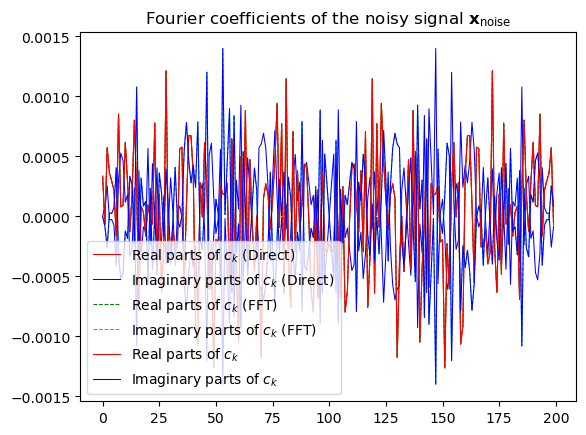

In [16]:
# Complex Fourier coefficients calculated directly

# ========= YOUR CODE STARTS HERE ========= #
x_noise = np.random.normal(0, 0.01, 200)

# Length of the signal
N = len(x_noise)

# Create the matrix of sampled exponentials
compl_exp = np.exp(2 * np.pi * 1j * np.outer(np.arange(N), np.arange(N)) / N)

# Calculate complex Fourier coefficients using the direct approach
c_direct = np.dot(x_noise, compl_exp) / N

# Calculate complex Fourier coefficients using FFT
c_fft = np.fft.fft(x_noise) / N

# Plot real and imaginary parts of c_k
plt.plot(c_direct.real, 'r', lw=0.75, label="Real parts of $c_k$ (Direct)")
plt.plot(c_direct.imag, 'b', lw=0.75, label="Imaginary parts of $c_k$ (Direct)")

# Plot real and imaginary parts of c_k using FFT
plt.plot(c_fft.real, 'g--', lw=0.75, label="Real parts of $c_k$ (FFT)")
plt.plot(c_fft.imag, 'c--', lw=0.75, label="Imaginary parts of $c_k$ (FFT)")


c = c_fft
# ========== YOUR CODE ENDS HERE ========== #

plt.plot(c.real.T, 'r', lw = 0.75, label = "Real parts of $c_k$")
plt.plot(c.imag.T, 'b', lw = 0.75, label = "Imaginary parts of $c_k$")
plt.title('Fourier coefficients of the noisy signal $\mathbf{x}_{\mathrm{noise}}$')
plt.legend()
plt.show()

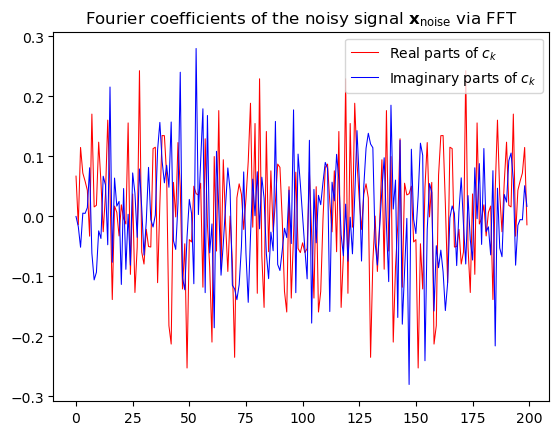

In [17]:
# Complex Fourier coefficients via FFT
freq = fft(x_noise)

plt.plot(freq.real, 'r', lw = 0.75, label = "Real parts of $c_k$")
plt.plot(freq.imag, 'b', lw = 0.75, label = "Imaginary parts of $c_k$")
plt.title('Fourier coefficients of the noisy signal $\mathbf{x}_{\mathrm{noise}}$ via FFT')
plt.legend()
plt.show()

In [18]:
np.allclose(c, freq/200)

True

---    
#### **Remark**
Recall the Euler formula
$$ \sin(\alpha x) =  \frac{\mathrm{e}^{\mathrm{i}\alpha x} - \mathrm{e}^{-\mathrm{i}\alpha x}}{2\mathrm{i}};$$
this gives the Fourier coefficients of $\sin(\alpha x)$. Noting that $c_{-k}$ can identified with $c_{N-k}$, this sheds light on the distribution of the Fourier coefficients for the signal $\mathbf{x}$    


---

#### **Your explanations for task 3.1 come here**

We can clearly see that for the first and second plot we have a coefficients with absolute values greater than 0.1 for the first one, and 0.2 for the second one. The spikes can be explained as with the previous tasks, because we add an coefficient with significant frequency, henceforth, the coefficient is large.

Utilizing a more suitable orthogonal basis of sampled exponentials, we calculated complex Fourier coefficients $(\(c_k\))$ of the noisy signal $\(\mathbf{x}_{\mathrm{noise}}\)$. We observed mid-point symmetry in the real and imaginary parts, where the real parts are even functions and the imaginary parts are odd functions. The direct approach and Fast Fourier Transform (FFT) were employed to compute $\(c_k\)$, revealing small real parts and spiking imaginary parts for specific values of $\(k\)$.

---





---
### Task 3.2

- Make sure that the noisy signal $\mathbf{x}_\mathrm{noise}$ is perfectly reconstructed via $\mathtt{ifft}$
- Reconstruct the noisy signal $\mathbf{x}_\mathrm{noise}$ directly and compare with the original
- Set the coefficients nos. 11 to 189 to zero and reconstruct the signal. Comment on the observed effect
- Take the smooth signal $\mathbf{x}$ and construct the Fourier coefficients using $\texttt{fft}$. Plot the real and imaginary parts and comment on the difference with the noiseless case
---

In [19]:
np.allclose(x_noise, ifft(freq))

True

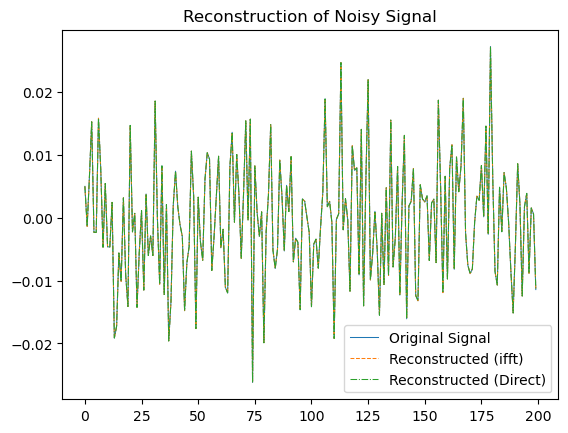

/Users/rkovalch/miniconda3/envs/cv-labs/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


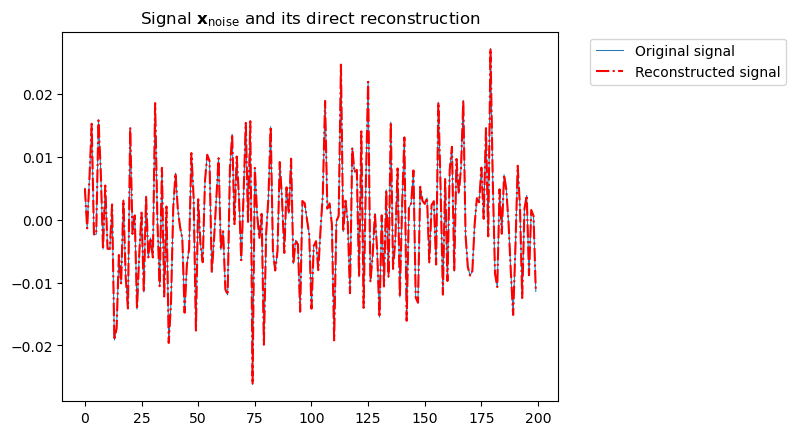

In [20]:
# ========= YOUR CODE STARTS HERE ========= #
np.random.seed(42)  # Set a specific seed value for reproducibility
x_noise = np.random.normal(0, 0.01, 200)

# Length of the signal
N = len(x_noise)

# Reconstruct the noisy signal using ifft
freq = np.fft.fft(x_noise)
x_reconstructed_ifft = np.fft.ifft(freq)

# Reconstruct the noisy signal directly
c = np.fft.fft(x_noise)
#c[11:190] = 0  # Set coefficients 11 to 189 to zero
x_direct_reconstructed = np.fft.ifft(c)

# Plot the original and reconstructed signals using ifft and direct reconstruction
plt.plot(x_noise, label="Original Signal", lw=0.75)
plt.plot(np.real(x_reconstructed_ifft), "--", label="Reconstructed (ifft)", lw=0.75)
plt.plot(np.real(x_direct_reconstructed), "-.", label="Reconstructed (Direct)", lw=0.75)
plt.legend()
plt.title('Reconstruction of Noisy Signal')
plt.show()

x_rec_F = x_direct_reconstructed
# ========= YOUR CODE ENDS HERE ========= #


plt.plot(x_noise, lw = 0.75, label = "Original signal")
plt.plot(x_rec_F.T, "r-.", label = "Reconstructed signal")
plt.title('Signal $\mathbf{x}_{\mathrm{noise}}$ and its direct reconstruction')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

Make sure the reconstructions (via FFT and direct) return original signal:


In [21]:
x_rec_FFT = ifft(freq)
np.allclose(x_noise, x_rec_FFT)

True

In [22]:
np.allclose(x_noise, x_rec_F)

True

Set all frequencies but for the first and the last $n$ (with say $n=10$ to zero and observe the result

In [23]:
freq_smoothed = freq.copy()
# ========= YOUR CODE STARTS HERE ========= #
freq_smoothed[11:-10] = 0
# ========= YOUR CODE ENDS HERE ========= #

In [24]:
np.sum(np.isclose(x_noise, ifft(freq_smoothed), rtol = 0.05))

1

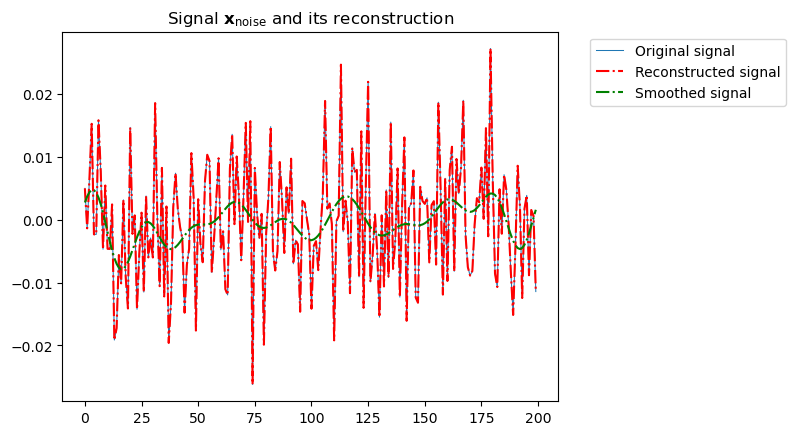

In [25]:
#  Plot the original noisy and smoothed signals

plt.plot(x_noise, lw = 0.75, label = "Original signal")
plt.plot(ifft(freq), 'r-.', label = "Reconstructed signal")
plt.plot(ifft(freq_smoothed), 'g-.', label = "Smoothed signal")
plt.title('Signal $\mathbf{x}_{\mathrm{noise}}$ and its reconstruction')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

Plot the Fourier coefficients (real and imaginary parts) of the initial smooth signal and compare to those in $\mathtt{freq\_smoothed}$


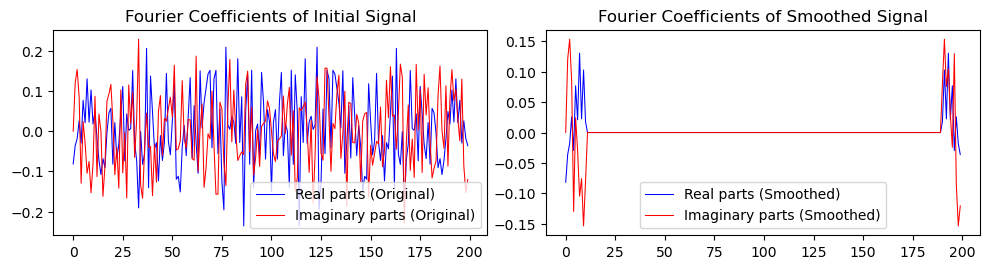

In [26]:
# ========= YOUR CODE STARTS HERE ========= #
# Plot the Fourier coefficients (real and imaginary parts) of the initial smooth signal
plt.figure(figsize=(10, 5))

plt.subplot(2, 2, 1)
plt.plot(freq.real, 'b', lw=0.75, label="Real parts (Original)")
plt.plot(freq.imag, 'r', lw=0.75, label="Imaginary parts (Original)")
plt.title('Fourier Coefficients of Initial Signal')
plt.legend()

# Plot the Fourier coefficients (real and imaginary parts) of the smoothed signal
plt.subplot(2, 2, 2)
plt.plot(freq_smoothed.real, 'b', lw=0.75, label="Real parts (Smoothed)")
plt.plot(freq_smoothed.imag, 'r', lw=0.75, label="Imaginary parts (Smoothed)")
plt.title('Fourier Coefficients of Smoothed Signal')
plt.legend()

plt.tight_layout()
plt.show()

# ========= YOUR CODE ENDS HERE ========= #

---

#### **Your explanations for Task 3.2 come here**

By zeroing specific frequency components, noise was reduced, and the signal was smoothed. The interaction between the FFT and its inverse (ifft) showcased seamless transitions between time and frequency domains for signal reconstruction.

**Zeroing Elements from 11 to 190:**
   - Setting Fourier coefficients from 11 to 190 to zero filters out higher frequencies, smoothing the signal and removing noise.

**Relationship between ifft and fft:**
   - The following lines shows the inverse relationship between FFT and ifft, ensuring perfect reconstruction.
```
freq = np.fft.fft(x_noise)
x_reconstructed_ifft = np.fft.ifft(freq)
```

**Setting All Frequencies but for the First and Last $n$ to Zero:**
   - Preserving only the lowest and highest frequencies by zeroing intermediate ones results in spikes at $k = 0$ and $k = 200$ in the smoothed signal.

**Comparison of Fourier Coefficients:**
   - Fourier coefficients of the initial smooth signal display heterogeneity and noise, while the smoothed signal exhibits spikes at the preserved lowest and highest frequencies.

**np.sum(np.isclose(x_noise, ifft(freq_smoothed), rtol=0.05)):**
   - The result may vary with differenet random seed, however the FFT and IFFT are deterministic methods, but if we add noise from normal distribution, the number of indicates of close similarity between the original noisy signal and the smoothed signal reconstructed using ifft may vary. (in my case with different runs I observed values from 0 to 6 points), so I used `np.random.seed` to fix the noise for reproducibility

---

## 4. Conclusions (0.3 pts)

Summarize in a few sentences what you have learned and achieved by completing the tasks of this assignment


Through the tasks in this assignment, I applied Fourier analysis to understand and manipulate signals in the time and frequency domains. I successfully generated signals, added noise, and utilized the FFT and IFFT operations for signal transformation and reconstruction. By exploring the Fourier coefficients, I gained insights into the composition and characteristics of signals. Tasks involving noise reduction, smoothing, and frequency filtering demonstrated practical applications of Fourier analysis in signal processing. Additionally, I addressed nuances such as the impact of randomness on results, highlighting the importance of reproducibility in signal analysis. Overall, the tasks provided a comprehensive exploration of Fourier techniques for signal manipulation and interpretation.

Additionally, I understood how different K-values influences the reconstruction of original signal, how $a_k$ and $b_k$ are computed, and I calculated them manually, which helped me to understand the Fourier Series better. Furthermore I observed the impact of lesser K-values on Fourier Series, which may give me noiseless signal, even if we would have only the noisy one. Furthermore, utilizing FFT and IFFT, showed me how to use such modern methods for reducing the noise from the original signal by zeroing the high-amplitude parts of the series. Also the last task gave me a general understanding about the relationship of imaginary and real parts in Fourier Series, IFFT and FFT specifically.